In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [52]:
! git clone https://github.com/DS3001/labs

fatal: destination path 'labs' already exists and is not an empty directory.


In [53]:
df = pd.read_csv('/content/labs/04_hedonic_pricing/cars_hw.csv')
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [54]:
df['Price'] = df['Price'].astype(str).str[:-1].astype(int)

In [55]:
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,65700
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,68200
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,79300
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,41400
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,51500


<Axes: >

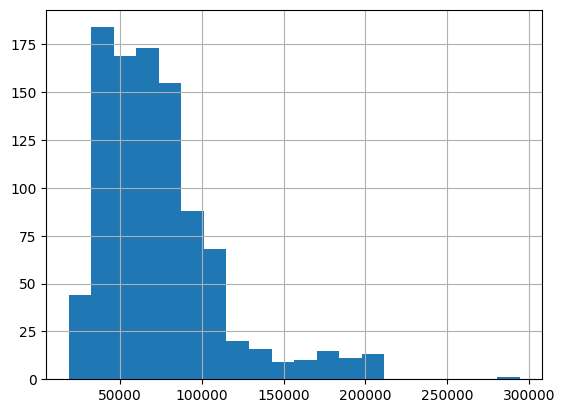

In [56]:
df['Price'].hist(bins=20)

<Axes: >

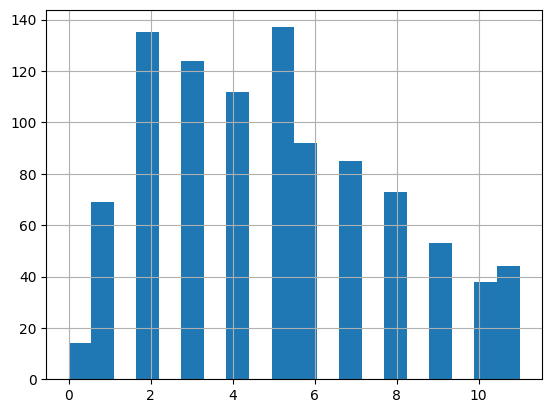

In [57]:
df['Age'] = max(df['Make_Year'])-df['Make_Year']
df['Age'].hist(bins=20)

<Axes: xlabel='Age', ylabel='Price'>

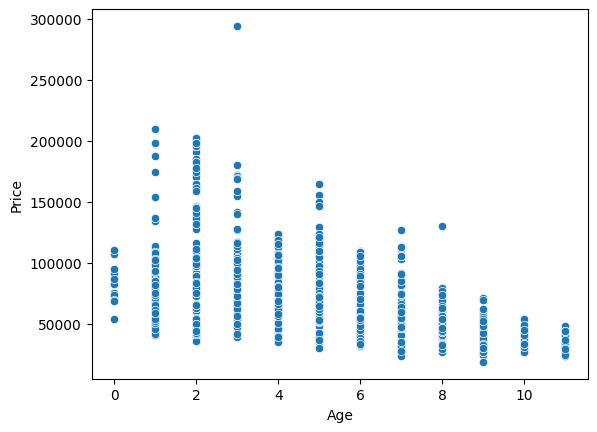

In [58]:
sns.scatterplot(data=df,y='Price',x='Age')

<Axes: xlabel='age_ihs', ylabel='price_ihs'>

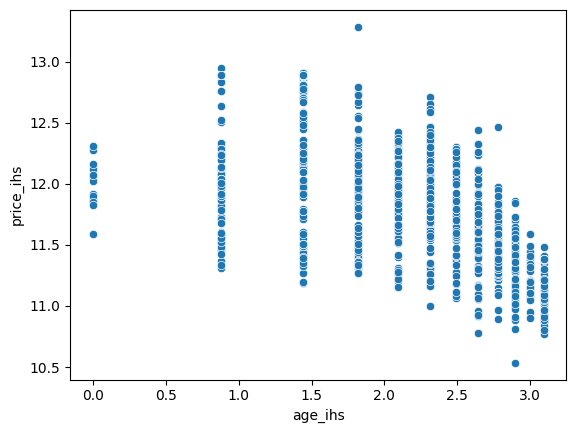

In [59]:
df['price_ihs'] = np.arcsinh(df['Price'])
df['age_ihs'] = np.arcsinh(df['Age'])
sns.scatterplot(data=df,y='price_ihs',x='age_ihs')

<Axes: >

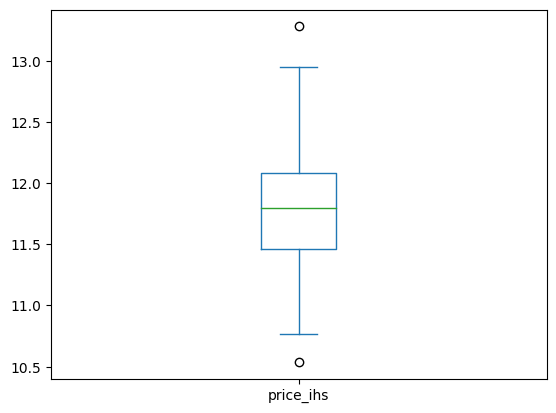

In [60]:
df['price_ihs'].plot.box()

<Axes: >

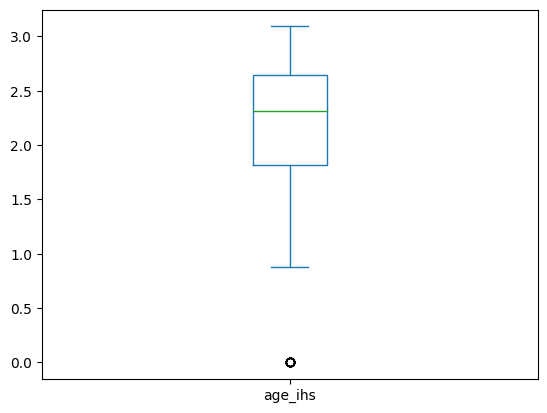

In [61]:
df['age_ihs'].plot.box()

In [62]:
# Drop outliers:
df = df.loc[df['price_ihs']<13,:]
df = df.loc[df['price_ihs']>11,:]
df = df.loc[df['age_ihs']>1,:]

<Axes: xlabel='age_ihs', ylabel='price_ihs'>

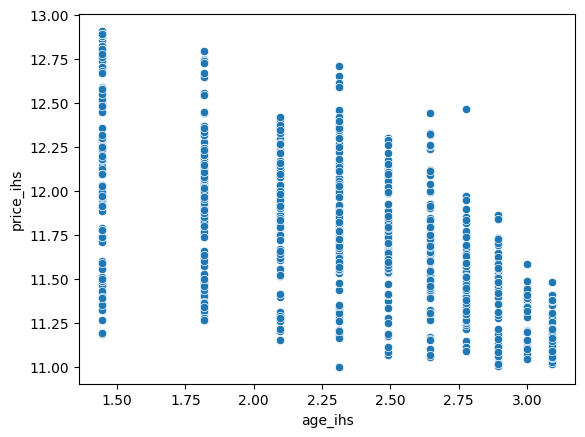

In [63]:
sns.scatterplot(data=df,y='price_ihs',x='age_ihs')

In [80]:
N = df.shape[0]
df = df.sample(frac=1, random_state=100)
train_size = int(.8*N)

df_train = df[0:train_size]
y_train = df_train['price_ihs']

df_test = df[train_size:]
y_test = df_test['price_ihs']

In [81]:
def slr(x,y): # Single Linear Regression Function
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = np.inner(x-x_bar,y-y_bar)/np.inner(x-x_bar,x)
    b0 = y_bar - b1*x_bar
    y_hat = b0 + b1*x
    residuals = y - y_hat
    return({'b0':b0,'b1':b1,'y_hat':y_hat,'residuals':residuals})

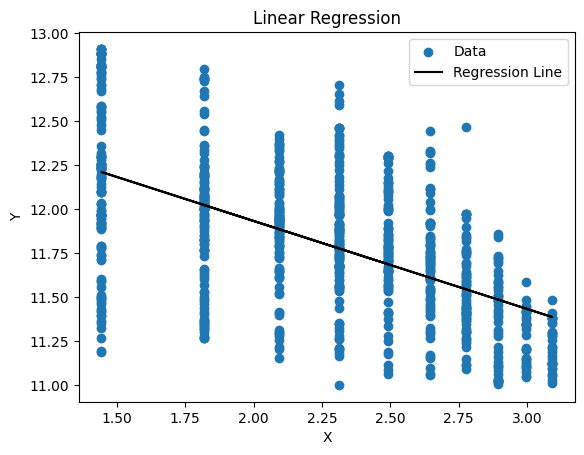

In [82]:
x = df['age_ihs']
y = df['price_ihs']

coef = slr(x,y)

y_hat = coef['b0']+coef['b1']*x
plt.scatter(x,y,label='Data')
plt.plot(x,y_hat,label='Regression Line',color='black')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='upper right')
plt.title('Linear Regression')

plt.show()

In [83]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, df_test['age_ihs'] * coef['b1'] + coef['b0']))
r2 = r2_score(y_test, df_test['age_ihs'] * coef['b1'] + coef['b0'])

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

RMSE: 0.38558822212007987
R-squared: 0.1568429864254598


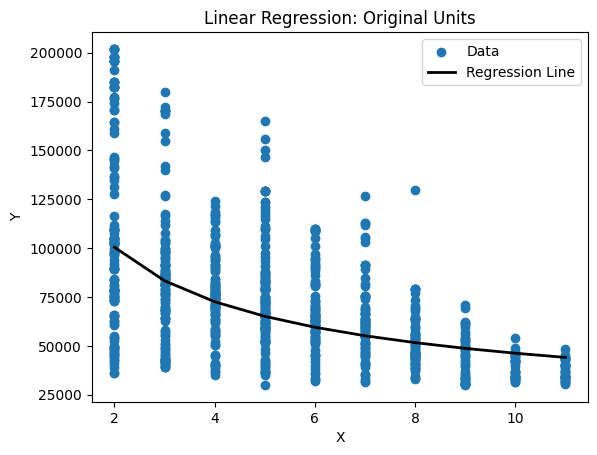

In [84]:
df.sort_values('Age',inplace=True) # Sorts the data by age of car

x = df['Age']
y = df['Price']
coef = slr( df['age_ihs'], df['price_ihs'])
y_hat = np.sinh(coef['b0']+coef['b1']*df['age_ihs']) # sinh is the inverse of arcsinh

plt.scatter(x,y,label='Data')
plt.plot(x,y_hat,label='Regression Line',color='black',linewidth=2)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='upper right')
plt.title('Linear Regression: Original Units')

plt.show()

In [85]:
rmse = np.sqrt(mean_squared_error(y_test, df_test['age_ihs'] * coef['b1'] + coef['b0']))
r2 = r2_score(y_test, df_test['age_ihs'] * coef['b1'] + coef['b0'])

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

RMSE: 0.38558822212007976
R-squared: 0.15684298642546035


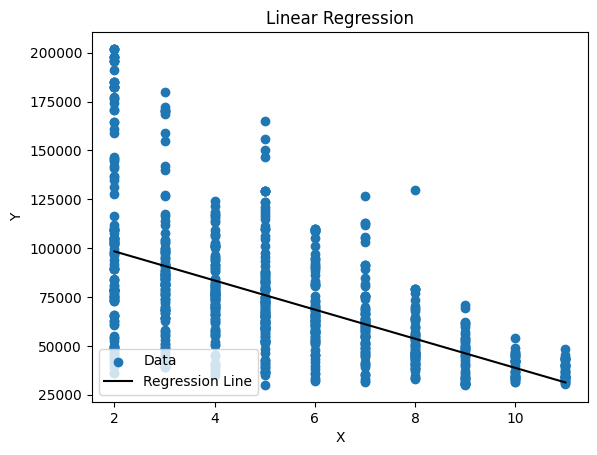

In [86]:
x = df['Age']
y = df['Price']

coef = slr(x,y)

y_hat = coef['b0']+coef['b1']*x
plt.scatter(x,y,label='Data')
plt.plot(x,y_hat,label='Regression Line',color='black')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='lower left')
plt.title('Linear Regression')

plt.show()

In [87]:
rmse = np.sqrt(mean_squared_error(y_test, df_test['age_ihs'] * coef['b1'] + coef['b0']))
r2 = r2_score(y_test, df_test['age_ihs'] * coef['b1'] + coef['b0'])

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

RMSE: 96631.10621806543
R-squared: -52953520667.78786


6. It's important to take a close look at the data before beginning to make graphs. I didn't look too closely at first and was very confused when the car prices were so high. The linear regression with original units had the best RMSE and R^2. The complex model overfits the data and makes it difficult to understand. Analyzing RMSE and R^2 when assessing the best model is the most foolproof way of ensuring correct model fitting.